In [1]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from StringIO import StringIO

In [2]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

<img src='iris.png'>

# IRIS Dataset

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
Iris-setosa (n=50) Iris-versicolor (n=50) Iris-virginica (n=50) And the four features of in Iris dataset are:
sepal length in cm sepal width in cm petal length in cm petal width in cm

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

### Check if there are any null values in the dataset

In [8]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


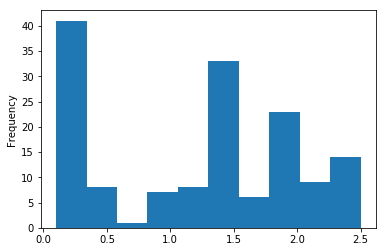

In [11]:
iris_df['petal width (cm)'].plot.hist()
plt.show()

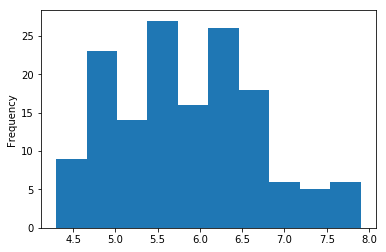

In [12]:
iris_df['sepal length (cm)'].plot.hist()
plt.show()

In [13]:
X = iris_df.values
Y = iris.target

In [14]:
X.shape

(150, 4)

In [15]:
Y.shape

(150,)

In [16]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X, Y)

In [17]:
Y_train

array([0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1,
       2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1])

In [18]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy')

In [19]:
dtc_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
dtc_entropy.score(X_test, Y_test)

0.92105263157894735

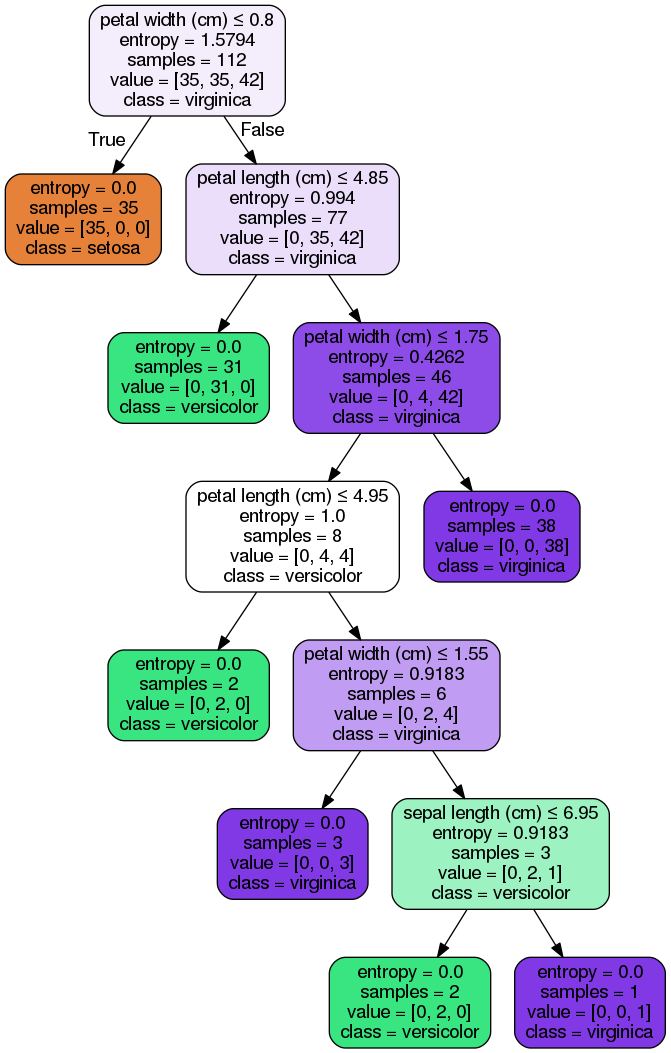

In [21]:
plot_decision_tree(dtc_entropy,iris.feature_names,iris.target_names)

In [22]:
dtc_gini = DecisionTreeClassifier(criterion='gini')
dtc_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
dtc_gini.score(X_test, Y_test)

0.92105263157894735

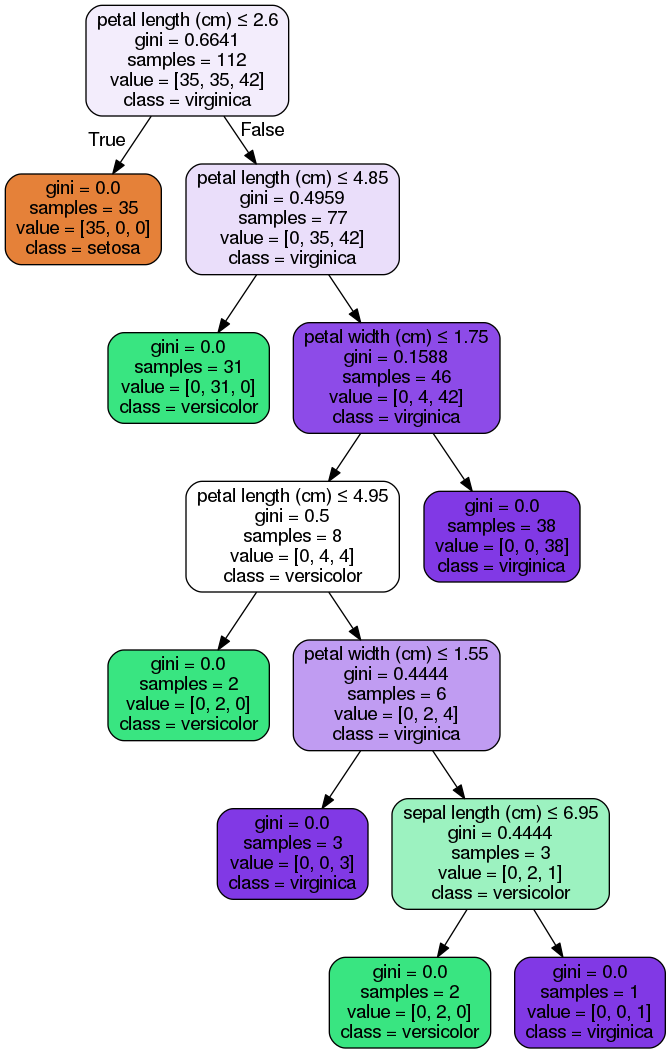

In [24]:
plot_decision_tree(dtc_gini,iris.feature_names,iris.target_names)